In [1]:
#below line is optional
#%tensorflow_version 1.x
import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
import keras
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

print(x_train.shape)


170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)


In [ ]:
from keras.utils import np_utils
x_train = x_train.reshape(50000,3072)
x_test = x_test.reshape(10000,3072)
x_train = x_train.astype('float32') #to normalize
x_test= x_test.astype('float32')
x_test = x_test/255.0 #normalizing
x_train= x_train/255.0
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)
y_test.shape

(10000, 10)

In [ ]:
model = Sequential()
model.add(Dense(200,batch_size=3072,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))

#binary -> sigmoid
#relu -> linear functions
#softmax -> used for multi-class classification problem

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 640,260
Trainable params: 640,260
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])
model_data = model.fit (x_train,y_train,epochs=6,batch_size=1000,validation_data=(x_test,y_test))

Epoch 1/6
50/50 [==============================] - 4s 59ms/step - loss: 1.6796 - accuracy: 0.3990 - val_loss: 1.6273 - val_accuracy: 0.4162
Epoch 2/6
50/50 [==============================] - 3s 52ms/step - loss: 1.5898 - accuracy: 0.4254 - val_loss: 1.5948 - val_accuracy: 0.4289
Epoch 3/6
50/50 [==============================] - 3s 52ms/step - loss: 1.5740 - accuracy: 0.4340 - val_loss: 1.5956 - val_accuracy: 0.4284
Epoch 4/6
50/50 [==============================] - 3s 52ms/step - loss: 1.5724 - accuracy: 0.4334 - val_loss: 1.5918 - val_accuracy: 0.4267
Epoch 5/6
50/50 [==============================] - 3s 54ms/step - loss: 1.5549 - accuracy: 0.4381 - val_loss: 1.6064 - val_accuracy: 0.4167
Epoch 6/6
50/50 [==============================] - 3s 54ms/step - loss: 1.5532 - accuracy: 0.4386 - val_loss: 1.5932 - val_accuracy: 0.4249


In [ ]:
loss, accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5932 - accuracy: 0.4249


In [ ]:
num_of_iteration= range(0,len(model_data.history['accuracy']))

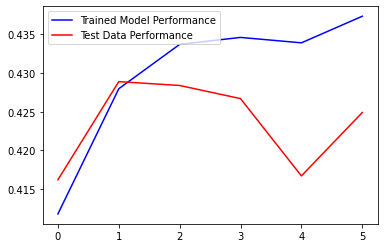

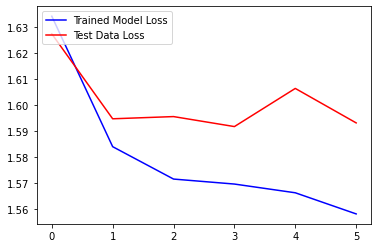

In [ ]:
import matplotlib.pyplot as plt
plt.plot(num_of_iteration, model_data.history['accuracy'],'b', label='Trained Model Performance')
plt.plot(num_of_iteration, model_data.history['val_accuracy'],'r',label='Test Data Performance')
plt.legend(loc='upper left')
plt.figure()
plt.plot(num_of_iteration,model_data.history['loss'],'b',label='Trained Model Loss')
plt.plot(num_of_iteration, model_data.history['val_loss'],'r',label='Test Data Loss')
plt.legend(loc='upper left')
plt.show()